In [ ]:
import numpy
from keras.datasets import imdb
from matplotlib import pyplot
from keras.datasets import imdb
import tensorflow as tf
from keras import regularizers
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()
X = numpy.concatenate((X_train, X_test), axis=0)
y = numpy.concatenate((y_train, y_test), axis=0)

In [ ]:
print("Training data: ")
print(X.shape)
print(y.shape)

Training data: 
(50000,)
(50000,)


In [ ]:
print("Classes: ")
print(numpy.unique(y))

Classes: 
[0 1]


In [ ]:
print("Number of words: ")
print(len(numpy.unique(numpy.hstack(X))))

Number of words: 
88585


Review length: 
Mean 234.76 words (172.911495)


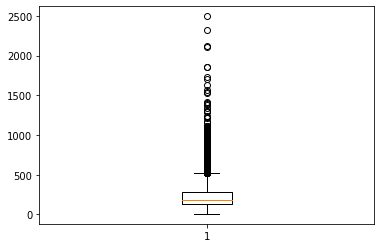

In [ ]:
# Summarize review length
print("Review length: ")
result = [len(x) for x in X]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))
# plot review length
pyplot.boxplot(result)
pyplot.show()

In [ ]:
imdb.load_data(nb_words=5000)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 4

In [ ]:
# load the dataset but only keep the top n words, zero the rest
top_words = 5000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/keras/datasets/imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the nda

In [ ]:
max_words = 500
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size = 0.5)
print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

(25000, 500)
(12500, 500)
(12500, 500)


In [ ]:
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))# choose out_put dim 
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(12, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
print(model.summary())


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 500, 32)           160000    
_________________________________________________________________
flatten_3 (Flatten)          (None, 16000)             0         
_________________________________________________________________
dense_10 (Dense)             (None, 250)               4000250   
_________________________________________________________________
dense_11 (Dense)             (None, 10)                2510      
_________________________________________________________________
dense_12 (Dense)             (None, 12)                132       
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 13        
Total params: 4,162,905
Trainable params: 4,162,905
Non-trainable params: 0
____________________________________________

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=2, mode='max')
history = model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=20, batch_size=128, verbose=2, callbacks=[callback])
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/20
196/196 - 22s - loss: 0.6923 - accuracy: 0.5175 - val_loss: 0.6886 - val_accuracy: 0.5452
Epoch 2/20
196/196 - 20s - loss: 0.6075 - accuracy: 0.6798 - val_loss: 0.4669 - val_accuracy: 0.8006
Epoch 3/20
196/196 - 20s - loss: 0.3385 - accuracy: 0.8676 - val_loss: 0.3274 - val_accuracy: 0.8611
Epoch 4/20
196/196 - 21s - loss: 0.2336 - accuracy: 0.9106 - val_loss: 0.3028 - val_accuracy: 0.8702
Epoch 5/20
196/196 - 21s - loss: 0.1793 - accuracy: 0.9358 - val_loss: 0.3027 - val_accuracy: 0.8722
Epoch 6/20
196/196 - 21s - loss: 0.1370 - accuracy: 0.9566 - val_loss: 0.3044 - val_accuracy: 0.8729
Epoch 7/20
196/196 - 21s - loss: 0.1046 - accuracy: 0.9697 - val_loss: 0.3210 - val_accuracy: 0.8693
Epoch 8/20
196/196 - 20s - loss: 0.0787 - accuracy: 0.9798 - val_loss: 0.3351 - val_accuracy: 0.8690
Accuracy: 86.90%


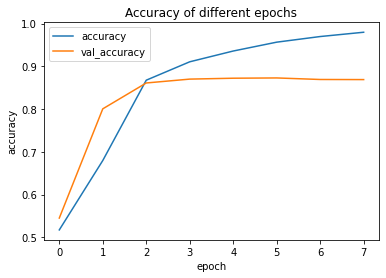

In [ ]:
legend = ['accuracy', 'val_accuracy']
plt.title('Accuracy of different epochs')
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(legend)